# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [138]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.**

## **conclusion =**

In [139]:
# load dataset
df = pd.read_excel('/content/Online Retail.xlsx')

In [140]:
df.shape

(541909, 8)

In [141]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [142]:
df.sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
394826,570886,20971,PINK BLUE FELT CRAFT TRINKET BOX,108,2011-10-13 10:23:00,1.06,13777.0,United Kingdom
291366,562449,22672,FRENCH BATHROOM SIGN BLUE METAL,3,2011-08-04 20:01:00,1.65,14562.0,United Kingdom


In [143]:
df[['Quantity','UnitPrice']] = df[['Quantity','UnitPrice']].abs()

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.**

# **Conclusion=**1.In this data set many missing values first column =Description	0.268% missing values and CustomerID	24.927% value missing and other column not any missing value

>>>Since all columns contain useful information, none need to be dropped.

>>>5268 full duplicates while keeping potential repeat transactions.

>>>fill missing value of column Description with mode/most frequent value and column CustomerID with 0 because I not sure about it.

In [145]:
# check missing values
round(df.isnull().sum()/len(df)*100,3)

,0
InvoiceNo,0.000
StockCode,0.000
Description,0.268
Quantity,0.000
InvoiceDate,0.000
UnitPrice,0.000
CustomerID,24.927
Country,0.000


In [146]:
invoice_no = 564530  # Specify the InvoiceNo
filtered_df = df[df['InvoiceNo'] == invoice_no][['InvoiceNo', 'CustomerID']]
print(filtered_df)


       InvoiceNo  CustomerID
313642    564530         NaN
313643    564530         NaN
313644    564530         NaN
313645    564530         NaN
313646    564530         NaN
313647    564530         NaN
313648    564530         NaN
313649    564530         NaN
313650    564530         NaN
313651    564530         NaN
313652    564530         NaN
313653    564530         NaN
313654    564530         NaN
313655    564530         NaN
313656    564530         NaN
313657    564530         NaN
313658    564530         NaN
313659    564530         NaN
313660    564530         NaN
313661    564530         NaN
313662    564530         NaN
313663    564530         NaN
313664    564530         NaN
313665    564530         NaN
313666    564530         NaN
313667    564530         NaN
313668    564530         NaN
313669    564530         NaN
313670    564530         NaN
313671    564530         NaN


In [147]:
(df['InvoiceNo']==564530).value_counts()

,count
InvoiceNo,
False,541879
True,30


In [148]:
df['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
17986.0,1
13256.0,1
18184.0,1


In [149]:
df['Description'].value_counts()

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
ANT SILVER TURQUOISE BOUDICCA RING,1
Damages,1
Found by jackie,1


# **check duplicated**

In [150]:
df.duplicated().sum()

np.int64(5268)

In [151]:
# df.drop_duplicates(subset=['CustomerID'], keep='first',inplace=True)
# Remove full duplicate rows
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [152]:
df.shape

(541909, 8)

In [153]:
# fill na values
df['CustomerID'].fillna(0, inplace=True)
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

<ipython-input-153-601c28f8d723>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(0, inplace=True)
<ipython-input-153-601c28f8d723>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [154]:
# check missing values
round(df.isnull().sum()/len(df)*100,3)

,0
InvoiceNo,0.0
StockCode,0.0
Description,0.0
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,0.0
Country,0.0


In [155]:
# numeric columns
df_num = df.select_dtypes(include=['number'])

In [156]:
df_num

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [157]:
# categorical columns
df_cat = df.select_dtypes(include=['object']).columns
df_cat

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

# **Explore the basic statistics of the dataset, including measures of central tendency and dispersion.**




In [158]:
# Generate basic statistics for numerical columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,541909.000000
mean,11.340487,2011-07-04 13:34:57.156386048,4.692766,11476.974671
min,1.000000,2010-12-01 08:26:00,0.000000,0.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,12352.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,14382.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16255.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,217.995482,NaN,96.755927,6777.908326


# **Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.**

In [159]:

df_num['Quantity'] = np.log1p(df_num['Quantity'])
df_num['UnitPrice'] =  np.log1p(df_num['UnitPrice'])

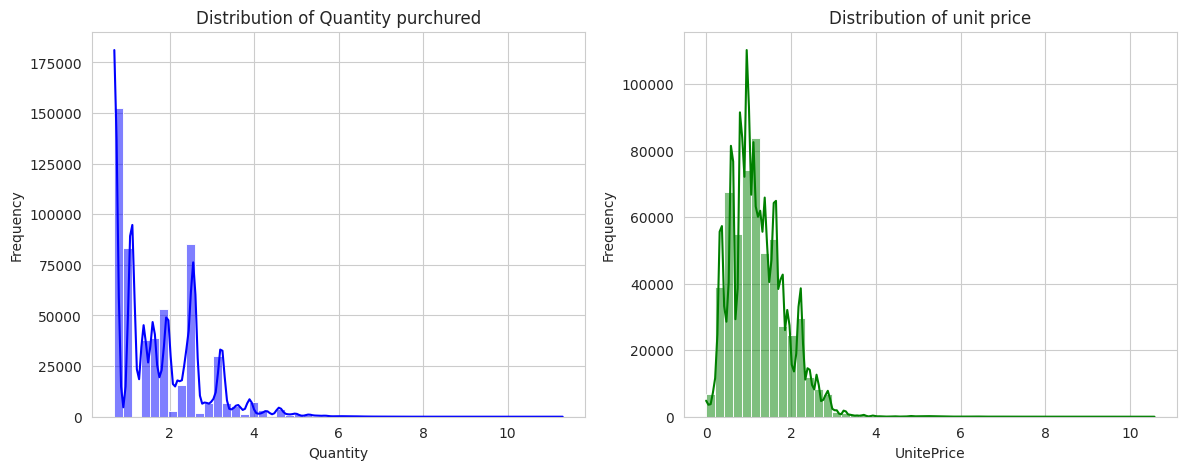

In [160]:
# # Set plot style
sns.set_style("whitegrid")
# Create subplots for Quantity and Unit Price histograms
fig,axes =plt.subplots(1,2,figsize=(14,5))
# Histogram for Quantity
sns.histplot(df_num['Quantity'],bins=50,kde=True,color='blue',ax=axes[0])
axes[0].set_title("Distribution of Quantity purchured")
axes[0].set_xlabel("Quantity")
axes[0].set_ylabel("Frequency")

# Histogram for Unit Price
sns.histplot(df_num['UnitPrice'], bins=50,kde=True,color='green',ax=axes[1])
axes[1].set_title("Distribution of unit price")
axes[1].set_xlabel("UnitePrice")
axes[1].set_ylabel("Frequency")

plt.show()


In [161]:
df_num['Quantity'].skew()

np.float64(1.066359051195623)

<Axes: xlabel='Quantity', ylabel='UnitPrice'>

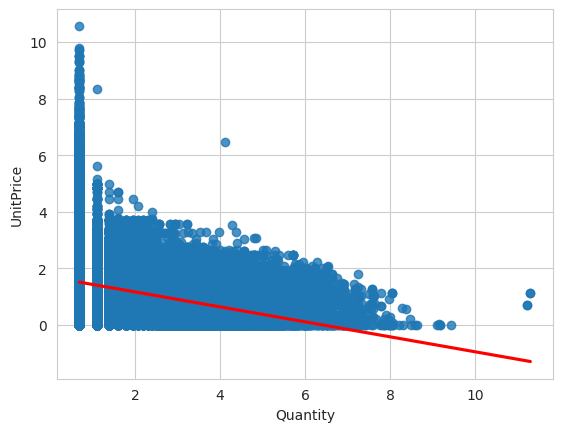

In [180]:
x =df['Quantity']
y = df['UnitPrice']

sns.regplot(x=np.log1p(x),y=np.log1p(y),data=df,line_kws={'color': 'red'})

# **Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.**

In [163]:
# Ensure InvoiceDate is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [164]:
# Ensure InvoiceDate is in datetime format
df["month"] =  df['InvoiceDate'].dt.month
df['Days'] = df['InvoiceDate'].dt.day_name()
# total sales find
df['totalsales'] = df['Quantity']*df['UnitPrice']

In [165]:
# Aggregate sales by month
montly_sales = df.groupby(['month']).agg({'totalsales':'sum'}).sort_values(by ='totalsales',ascending=False)
montly_sales

,totalsales
month,
12,1742452.610
11,1557236.410
10,1239253.930
9,1097492.722
8,835596.250
6,832356.680
1,822728.860
5,817738.530
7,757142.271


In [166]:
# Aggregate sales by day of the week
weekly_sales =  df.groupby(['Days']).agg({'totalsales':'sum'}).sort_values(by ='totalsales',ascending=False)
weekly_sales

,totalsales
Days,
Tuesday,2391082.431
Thursday,2293803.480
Friday,2140069.651
Monday,1970540.651
Wednesday,1968148.610
Sunday,821976.331


In [167]:
# Sort days of the week in order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = weekly_sales.reindex(day_order)
weekly_sales

,totalsales
Days,
Monday,1970540.651
Tuesday,2391082.431
Wednesday,1968148.610
Thursday,2293803.480
Friday,2140069.651
Saturday,NaN
Sunday,821976.331


In [168]:
print(type(montly_sales))  # Should be <class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'>


In [169]:
 montly_sales= montly_sales.squeeze()


<ipython-input-170-8d2a70040eba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=montly_sales.index,y=montly_sales.values,ax=axes[1],palette="viridis")
<ipython-input-170-8d2a70040eba>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


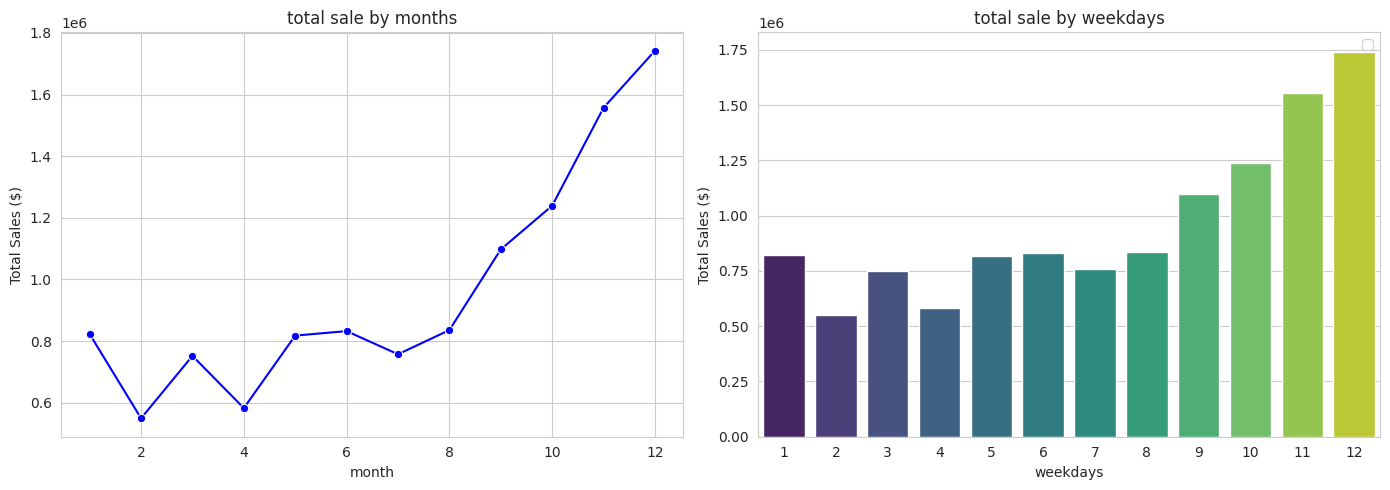

In [170]:
# Plot sales trends
fig,axes =plt.subplots(1,2,figsize=(14,5))
# monthly sales trends use lineplot
sns.lineplot(x=montly_sales.index,y=montly_sales.values,marker='o',ax=axes[0],color='blue')
axes[0].set_title("total sale by months")
axes[0].set_xlabel("month")
axes[0].set_ylabel('Total Sales ($)')
# week day sales use barchart
sns.barplot(x=montly_sales.index,y=montly_sales.values,ax=axes[1],palette="viridis")
axes[1].set_title("total sale by weekdays")
axes[1].set_xlabel("weekdays")
axes[1].set_ylabel('Total Sales ($)')
# Display plots
plt.tight_layout()
plt.legend()
plt.show()

# **Explore the top-selling products and countries based on the quantity sold.**

In [171]:
# Top 10 best-selling products by total quantity sold
top_selling_product = df.groupby("Description")["Quantity"].sum().nlargest(10)
top_selling_product

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",161990
MEDIUM CERAMIC TOP STORAGE JAR,152527
WHITE HANGING HEART T-LIGHT HOLDER,119176
WORLD WAR 2 GLIDERS ASSTD DESIGNS,56247
JUMBO BAG RED RETROSPOT,49593
POPCORN HOLDER,37188
PACK OF 72 RETROSPOT CAKE CASES,36799
ASSORTED COLOUR BIRD ORNAMENT,36541
RABBIT NIGHT LIGHT,30896


In [172]:
# Top 10 countries by total quantity sold
top_countries = df.groupby("Country")["Quantity"].sum().nlargest(5)
top_countries

,Quantity
Country,
United Kingdom,5203809
Netherlands,201746
EIRE,152257
Germany,121078
France,113728


<ipython-input-173-c782d7b5b8a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_selling_product.values,y=top_selling_product.index,palette="Blues_r")


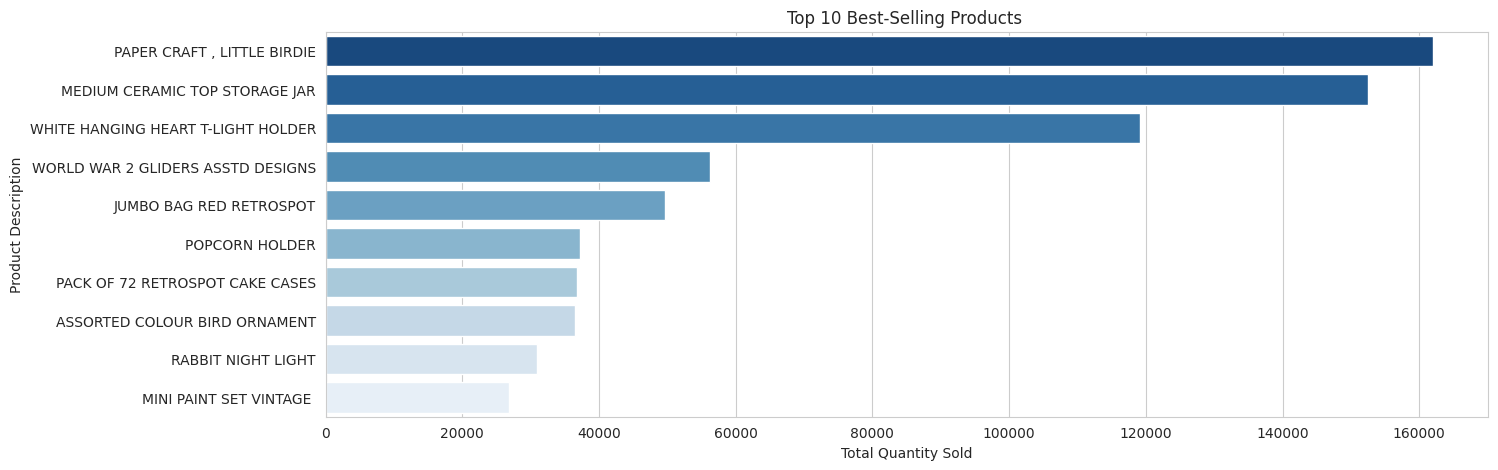

In [173]:
#barplot of top product sales by quantity
plt.figure(figsize=(15,5))
sns.barplot(x = top_selling_product.values,y=top_selling_product.index,palette="Blues_r")
plt.title("Top 10 Best-Selling Products ")
plt.xlabel("Total Quantity Sold")
plt.ylabel('Product Description')
plt.show()

<ipython-input-174-e081135281eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index,y=top_countries.values,palette=sns.color_palette("Set2"))
<ipython-input-174-e081135281eb>:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x=top_countries.index,y=top_countries.values,palette=sns.color_palette("Set2"))


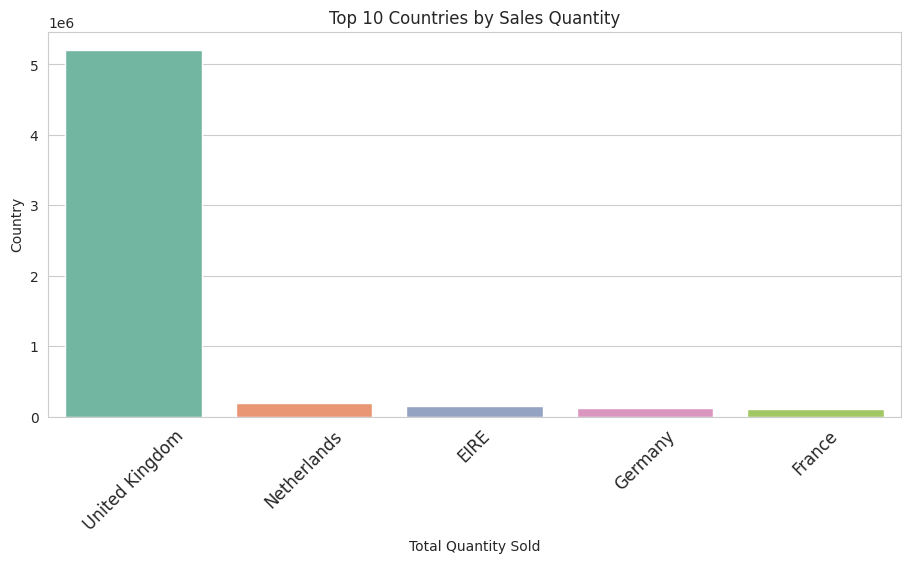

In [174]:
#barplot for top country sold product
plt.figure(figsize=(11,5))
sns.barplot(x=top_countries.index,y=top_countries.values,palette=sns.color_palette("Set2"))
plt.xlabel("Total Quantity Sold")
plt.ylabel("Country")
plt.title("Top 10 Countries by Sales Quantity")
plt.tick_params(axis='x', rotation=45, labelsize=12)

plt.show()

In [119]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'month', 'Days', 'totalsales'],
      dtype='object')

# **Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.**

Number of Transactions with Negative or Zero Quantity/UnitPrice: 2515
Number of Outliers Detected using IQR: 97412
Number of Outliers Detected using Z-score: 716


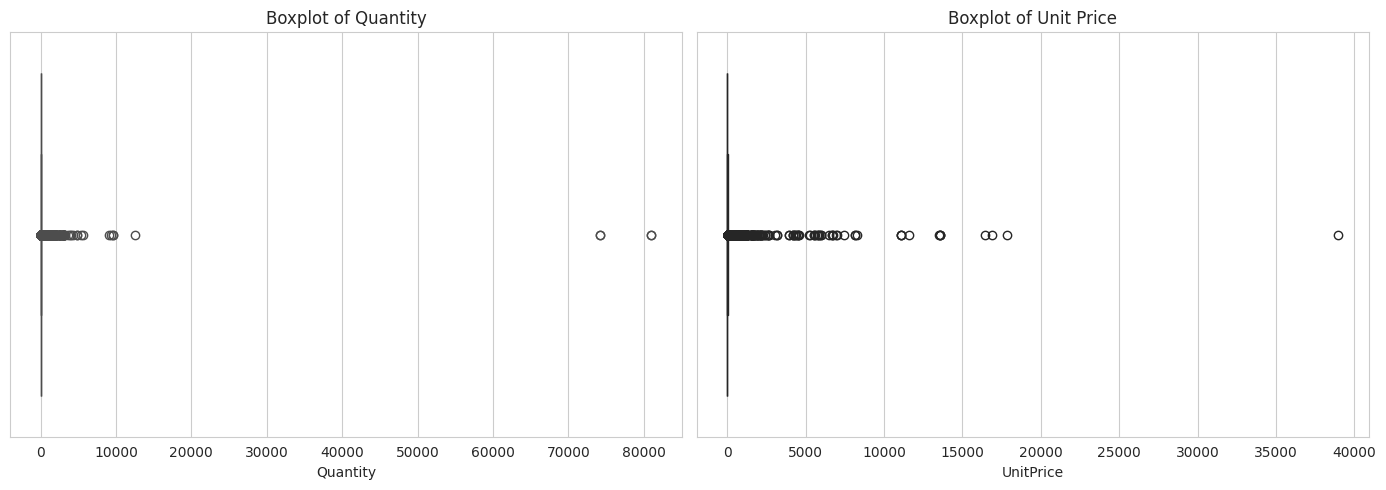

In [188]:
from scipy.stats import zscore

# 1. Detect Negative or Zero Values in Quantity & UnitPrice
negative_values = df[(df["Quantity"] <= 0) | (df["UnitPrice"] <= 0)]
print("Number of Transactions with Negative or Zero Quantity/UnitPrice:", len(negative_values))

# 2. Detect Outliers using IQR Method
Q1 = df[["Quantity", "UnitPrice"]].quantile(0.25)
Q3 = df[["Quantity", "UnitPrice"]].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values beyond 1.5 * IQR
outliers_iqr = df[
    (df["Quantity"] < (Q1["Quantity"] - 1.5 * IQR["Quantity"])) |
    (df["Quantity"] > (Q3["Quantity"] + 1.5 * IQR["Quantity"])) |
    (df["UnitPrice"] < (Q1["UnitPrice"] - 1.5 * IQR["UnitPrice"])) |
    (df["UnitPrice"] > (Q3["UnitPrice"] + 1.5 * IQR["UnitPrice"]))
]
print("Number of Outliers Detected using IQR:", len(outliers_iqr))

# 3. Detect Outliers using Z-Score Method (Threshold = 3)
df["Quantity_Zscore"] = np.abs(zscore(df["Quantity"]))
df["UnitPrice_Zscore"] = np.abs(zscore(df["UnitPrice"]))

outliers_zscore = df[(df["Quantity_Zscore"] > 3) | (df["UnitPrice_Zscore"] > 3)]
print("Number of Outliers Detected using Z-score:", len(outliers_zscore))

# 4. Plot Boxplots for Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot for Quantity
sns.boxplot(x=df["Quantity"], ax=axes[0], color="blue")
axes[0].set_title("Boxplot of Quantity")

# Boxplot for UnitPrice
sns.boxplot(x=df["UnitPrice"], ax=axes[1], color="green")
axes[1].set_title("Boxplot of Unit Price")

plt.tight_layout()
plt.show()


# **Draw conclusions and summarize your findings from the exploratory data analysis.**

Refined Conclusion of the Online Retail EDA

1. Data Quality and Issues

Missing Values: The CustomerID column has missing values, which can impact customer-level insights. If customer analysis is crucial, missing values should be handled carefully.

Negative Quantities: Some transactions have negative Quantity values, which likely represent product returns. These should be analyzed separately from regular sales.

Outliers in Pricing: The UnitPrice column has significant variation, with some extreme values that might indicate pricing errors or luxury products.


2. Sales and Customer Insights

Sales Distribution: Most transactions are concentrated in a few countries, with a small number of regions contributing the majority of sales.

Customer Behavior: Since CustomerID is missing for some transactions, customer segmentation might be incomplete. However, repeat customers could be analyzed based on available data.


3. Business Recommendations

Data Cleaning: Remove or impute missing values in CustomerID, handle negative Quantity values, and check for unrealistic UnitPrice values.

Return Analysis: Identify the most frequently returned products and possible reasons (e.g., quality issues, incorrect orders).

Revenue Optimization: Analyze high-value transactions separately and identify factors influencing higher spending patterns. **bold text**